<a href="https://colab.research.google.com/github/dcreeder89/boston-housing-regression-metrics/blob/main/Reeder_Ensemble_Trees_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Trees Exercise
- Christina Reeder
- 22 Dec 2022

Your task is to create the best possible model to predict house prices.

1. Try a Decision Tree, Bagged Tree, and Random Forest.

2. Tune each model to optimize performance on the test set.

3. Evaluate your best model using multiple regression metrics.

4. Explain in a text cell how your model will perform if deployed by referring to the metrics.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

## Load and look at dataframe

In [54]:
filename='/content/drive/MyDrive/Coding Dojo/06 Week 6: Regression Models/Core Assignments/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(filename)

In [55]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [56]:
# check for missing values
df.isna().sum()

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

In [57]:
# check for duplicate rows
df.duplicated().sum()

0

## Assign target, features, and train test split

In [58]:
# assign target and features
y = df['PRICE'].copy()
X = df.drop(columns='PRICE').copy()

In [59]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Decision Tree

In [60]:
# instantiate the model
dec_tree = DecisionTreeRegressor(random_state=42)

In [61]:
# fit model using training data
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
# evaluate model r2 score
dec_tree_train_score = dec_tree.score(X_train, y_train)
dec_tree_test_score = dec_tree.score(X_test, y_test)
print(dec_tree_train_score)
print(dec_tree_test_score)

1.0
0.6193230918136841


> This model is overfitting the data. We can see this because the training score is much higher than the testing score.

### Tune the model

#### Explore the first model created

In [63]:
# explore parameters
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [64]:
# look at depth of model
dec_tree.get_depth()

20

#### Optimizing max_depth of model

In [65]:
# list of values to try for max_depth
depths = list(range(2,20))

# dataframe to store score for each value of max_depth
dec_tree_scores = pd.DataFrame(index=depths, columns=['Train Score','Test Score'])

# inumerate through values to find best max_depth
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  dec_tree_scores.loc[depth, 'Train Score'] = dec_tree.score(X_train, y_train)
  dec_tree_scores.loc[depth, 'Test Score'] = dec_tree.score(X_test, y_test)

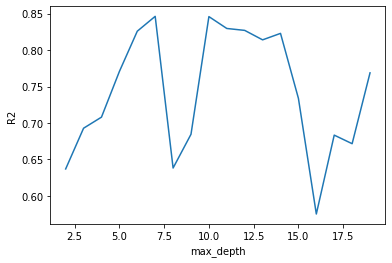

In [66]:
# visualize with max_depth leads to highest score in test data
plt.plot(depths, dec_tree_scores['Test Score']);
plt.ylabel('R2');
plt.xlabel('max_depth');

In [67]:
# sort scores by Test Score
dec_tree_scores_sorted = dec_tree_scores.sort_values(by='Test Score', ascending=False)
dec_tree_scores_sorted.head()

,Train Score,Test Score
7,0.958517,0.846377
10,0.986796,0.84601
11,0.9911,0.829736
12,0.995358,0.827102
6,0.942742,0.825985


> Our optimized max_depth for this model is 7.

#### Rerun model with optimized max_depth 

In [68]:
dec_tree_optimal = DecisionTreeRegressor(max_depth=7, random_state=42)
dec_tree_optimal.fit(X_train, y_train)
dec_tree_optimal_train_score = dec_tree_optimal.score(X_train, y_train)
dec_tree_optimal_test_score = dec_tree_optimal.score(X_test, y_test)
print(dec_tree_optimal_train_score)
print(dec_tree_optimal_test_score)

0.958516936961625
0.8463768203632204


## Bagged Tree

In [69]:
# instantiate the model
bag_reg = BaggingRegressor(random_state=42)

In [70]:
# fit model using training data
bag_reg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [71]:
# evaluate model r2 score
bagreg_train_score = bag_reg.score(X_train, y_train)
bagreg_test_score = bag_reg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


### Tune the model

#### Explore first model created

In [72]:
# explore parameters
bag_reg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Optimizing n_estimators of model

In [73]:
# list of values to try for estimators
estimators = [10, 20, 30, 40, 50, 100]

# dataframe to store scores
bagreg_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])

# iterate through values to find best number of estimators
for num_estimators in estimators:
  bagreg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
  bagreg.fit(X_train, y_train)
  bagreg_scores.loc[num_estimators, 'Train Score'] = bagreg.score(X_train, y_train)
  bagreg_scores.loc[num_estimators, 'Test Score'] = bagreg.score(X_test, y_test)

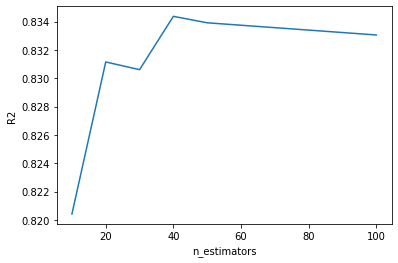

In [74]:
# visualise which n_estimators value leads to highest score in test data
plt.plot(estimators, bagreg_scores['Test Score']);
plt.ylabel('R2');
plt.xlabel('n_estimators');

In [75]:
# sort scores by Test Score
bagreg_scores_sorted = bagreg_scores.sort_values(by='Test Score', ascending=False)
bagreg_scores_sorted.head()

,Train Score,Test Score
40,0.97395,0.834365
50,0.975185,0.83391
100,0.977246,0.833051
20,0.9701,0.831147
30,0.973401,0.830604


> Our optimal number of estimators is around 40, so we will use this value for our optimized model.

### Rerun model with optimized n_estimators 

In [76]:
bagreg_optimal = BaggingRegressor(n_estimators=40, random_state=42)
bagreg_optimal.fit(X_train, y_train)
bagreg_optimal_train_score = bagreg_optimal.score(X_train, y_train)
bagreg_optimal_test_score = bagreg_optimal.score(X_test, y_test)
print(bagreg_optimal_train_score)
print(bagreg_optimal_test_score)

0.9739496201366065
0.8343653587501565


## Random Forest

In [77]:
# instantiate the model
rf = RandomForestRegressor(random_state=42)

In [78]:
# fit model using training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# evaluate model r2 score
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


### Tune the model

#### Explore first model created

In [80]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [83]:
# check depth of model
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

23

#### Optimizing max_depth of the model

In [84]:
# list of values to try for max_depth
depths = range(1, max(est_depths))

# dataframe to store score for each value of max_depth 
rf_depth_scores = pd.DataFrame(index=depths, columns=['Train Score', 'Test Score'])

# inumerate through values to find best max_depth 
for depth in depths:
  rf = RandomForestRegressor(max_depth=depth, random_state=42)
  rf.fit(X_train, y_train)
  rf_depth_scores.loc[depth, 'Train Score'] = rf.score(X_train, y_train)
  rf_depth_scores.loc[depth, 'Test Score'] = rf.score(X_test, y_test)

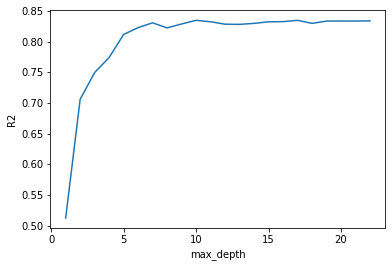

In [86]:
# visualize which max_depth leads to highest score in test data
plt.plot(depths, rf_depth_scores['Test Score']);
plt.ylabel('R2');
plt.xlabel('max_depth');

In [87]:
# sort scores by Test Score
rf_depth_scores_sorted = rf_depth_scores.sort_values(by='Test Score', ascending=False)
rf_depth_scores_sorted.head()

,Train Score,Test Score
10,0.973927,0.834747
17,0.977102,0.834732
22,0.977134,0.83386
20,0.977103,0.833637
21,0.977131,0.833636


> Our optimized max_depth for this model is 10. 

#### Optimizing n_estimators

In [93]:
# list of values for n_estimators
n_est = [50, 75, 100, 125, 150, 175, 200, 225, 250]

# dataframe to store score for each value of estimators
rf_est_scores = pd.DataFrame(index=n_est, columns=['Train Score','Test Score'])

# inumerate through values to find best number of estimators
for n in n_est:
  rf = RandomForestRegressor(max_depth=10, n_estimators=n, random_state=42)
  rf.fit(X_train, y_train)
  rf_est_scores.loc[n, 'Train Score'] = rf.score(X_train, y_train)
  rf_est_scores.loc[n, 'Test Score'] = rf.score(X_test, y_test)

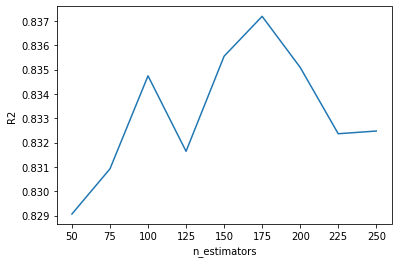

In [94]:
# visualize which number of estimators leads to highest score in test data
plt.plot(n_est, rf_est_scores['Test Score']);
plt.xticks(n_est);
plt.ylabel('R2');
plt.xlabel('n_estimators');

In [95]:
# sort scores by Test score
rf_est_scores_sorted = rf_est_scores.sort_values(by='Test Score', ascending = False)
rf_est_scores_sorted.head()

,Train Score,Test Score
175,0.97298,0.837192
150,0.97304,0.835554
200,0.972733,0.835094
100,0.973927,0.834747
250,0.9733,0.832479


> Optimized number of estimators is around 175.

### Rerun model with optimized max_depth and n_estimators

In [97]:
rf_optimal = RandomForestRegressor(max_depth=10, n_estimators=175, random_state=42)
rf_optimal.fit(X_train, y_train)
rf_optimal_train_score = rf_optimal.score(X_train, y_train)
rf_optimal_test_score = rf_optimal.score(X_test, y_test)
print(rf_optimal_train_score)
print(rf_optimal_test_score)

0.9729799982471313
0.8371923216968187


## Compare optimized models against eachother

In [104]:
print(f'Optimized Decision Tree model scores:\n\tTest: {dec_tree_optimal_test_score*100:,.2f}%\n\tTrain: {dec_tree_optimal_train_score*100:,.2f}%\n')
print(f'Optimized Bagged Tree model scores:\n\tTest: {bagreg_optimal_test_score*100:,.2f}%\n\tTrain: {bagreg_optimal_train_score*100:,.2f}%\n')
print(f'Optimized Random Forest model scores:\n\tTest: {rf_optimal_test_score*100:,.2f}%\n\tTrain: {rf_optimal_train_score*100:,.2f}%')

Optimized Decision Tree model scores:
	Test: 84.64%
	Train: 95.85%

Optimized Bagged Tree model scores:
	Test: 83.44%
	Train: 97.39%

Optimized Random Forest model scores:
	Test: 83.72%
	Train: 97.30%


> Our Decision tree model resulted in the best R2 scores for the testing set, therefore, it will be the model we deep dive into the metrics for. 

## Evaluate best model using multiple regression metrics

In [105]:
# predict price using the optimized decision tree model
train_pred = dec_tree_optimal.predict(X_train)
test_pred = dec_tree_optimal.predict(X_test)

In [107]:
# Calculate model MAE
train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)

print(f'Model Training MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Training MAE: 1.3467299071381464
Model Testing MAE: 2.4472495639696175


In [108]:
# Calculate model MSE
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f'Model Training MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Training MSE: 3.678789859786468
Model Testing MSE: 10.757792469053147


In [110]:
# Calculate model RMSE
train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1.9180171687934569
Model Testing RMSE: 3.2799073872676874


> According to our MAE and RMSE, our optimized model will be off by between 2.4 and 3.3 thousand dollars on the predicted housing prices (as seen from the testing data metrics). Since the RMSE is slightly larger than the MAE, this also tells us that there are some large errors in our data predictions. 